# Problem : Solving Schrodinger Equation for Various Potentials

## Developing Hamiltonian for Schrodinger Equation
Time independent Schrodinger Equation for one dimension is given below:

$$-\frac{\hbar^2}{2m}\frac{\partial^{2}{\Psi}}{\partial{x^{2}}} + V(x)  \Psi = E \ \Psi$$

This is an eigenvalue equation. In this assignment we are using $\mathbf{Finite\ Difference \ Method \ (FDM)}$ to solve this 
partial differential equation for various potential. To use FDM we need to generate Hamiltonian matrix from the equation above 
using FDM formula for partial differential equation. To simplify the equation, we are using atomic unit where $\mathbf{ \hbar\ = \ 1}$ , mass of electron $\mathbf{ m \ = \ 1}$ , energy in $\mathbf{Hartree}$ unit and distance in $\mathbf{Bohr}$ unit. 
So the simplified equation is,

$$-\frac{1}{2}\frac{\partial^{2}{\Psi}}{\partial{x^{2}}} + V(x)  \Psi = E \ \Psi$$

So FDM equation can now be formulated as, where $\Delta$ is the sample point difference between spatial co-ordinates, $\Psi_{i}$ is the value of electron wavefunction at $i^{th}$ sample point, $V_{i}$ is the value of potential for  $i^{th}$ sample point and $\mathbf{n}$ is the total number of sampling points. So the equation turns out to be:

$$\frac{-\Psi_{i-1}}{2 \Delta^{2}} + (V_{i} + \frac{1}{\Delta^{2}})\Psi_{i} + \frac{-\Psi_{i+1}}{2\Delta^{2}}  = E \ \Psi \ \ \ for \ i =  1, 2 , ... , n$$

These n simultaneous linear equations can be written as matrix equations. In $\mathbf{matrix \ notation}$ we can write the above equation as follows:

$$ H_{i,j-1} \ \Psi_{i-1}^{n} +  H_{i,j} \ \Psi_{i}^{n} + H_{i,j+1} \ \Psi_{i+1}^{n}= \ E_{n}  \ \Psi_{i}^{n} \\ $$

$$ where, \ H_{i,j-1} = -\frac{1}{2 \Delta^{2}}, \\ $$
$$ H_{i,j} = V_{i} + \frac{1}{ \Delta^{2}} , \\ $$
$$ H_{i,j+1} = -\frac{1}{2\Delta^{2}} $$$$

Here $E_{n}$ is the $n^{th}$ eigenvalue and $\Psi_{i}^{n}$ is the $i_{th}$ component of the correcsponding eigenvector. Now the equation is rewritten in the matrix form:

$$ \mathbf{H} \ \mathbf{\Psi^{n}} = \ E_{n} \mathbf{\Psi^{n}} $$


The code is given below for constructing Hamiltonian using potential :

In [ ]:
function H = Hamiltonian(V, Delta)
    n = length(V);
    C = [1/Delta^2 -1/2/Delta^2 zeros(1,n-2)];
    H = toeplitz(C,C) + diag(V);
end

$\mathbf{Remarks \ about \ boundary \ values:}$ The Schrodinger equation in FDM format is an eigenvalue problem. So it doesn't need to have strict boundary values for bound states. The construction of Hamiltonian does suggest that the value of $\Psi_{0}$ and $\Psi_{n+1}$ is zero. This condition can also be interpreted diiferently by using the **Postulates of Quantum Mechanics**, one of which states that **the bound states eigen-wave-functions can be normalized to one**. Another way to express this condition is that **the bound state wavefunction must vanishes to the infinity** (which is implemented here). But for unbound state (e.g. free particle) this condition is not true (They are **delta function normalizable**).

Now we are specifying the potential and different systems:

### Solution of Schrodinger Equation for infinite potential well

$\mathbf{Problem \ Specification:}$ The system contitutes of the potential well with width $L = 4 \ bohr$ and the potential function is 

$$V(x) =  
\begin{cases}
    0,& \text{if } |x|\leq 2 \ \text{bohr}\\
    \infty,              & \text{otherwise}
\end{cases}
$$

We are assuming that, an electron may trapped into this potential well. So the first thing to do is to measure the lowest energy states of the trapped electron. This probelm is very poor approximation of quantum well originated from different type of heterostructures.This code snippet below creates the infinite well potential by approximating $\infty$ as $1000000 \ Hartree$.

In [30]:
n = 333;
x = linspace(-6,6,n);
V = [1e6*ones(1,n/3), zeros(1,n/3), 1e6*ones(1,n/3)];
Delta = x(2) - x(1);

$\mathbf{Next \ Step}$ : Using this potential into the $\mathbf{Hamiltonian}$ function we get the Hamiltonian for the system. Finally using MATLAB to find the first 4 smallest eigenvalus and eigenvectors for this Hamiltonian.

In [31]:
H = Hamiltonian(V,Delta);
[  eigenvectors, Energy_eigenvalue ] = eig(H);

Finally we plot the potential well with energy eigenvalues with it. This problem generates real wave function, which is also plotted alongside with the energy eigenvalues. For better visibility we multiply $1.5$ with the value of wavefunction.

$\mathbf{Comparison \ with \ theoretical \ calculation :}$ The acurate $n^{th}$ eigen wave-function for well width, $L = 4 \ \text{bohr}$ solution for the infinte potential well is given below:
$$\Psi^{n}(x) =  
\begin{cases}
    \sqrt{\frac{2}{L}}\sin \Big(\frac{n \ \pi \ x}{L} \Big),& \text{if } 0\leq x \leq L ( = 4 \ \text{bohr})\\
    0,              & \text{otherwise}
\end{cases}
$$
with eigen energy, $E_{n} = \frac{n^2h^2}{8mL^2}$. The value of eigen_energy from this equation also plotted in the figure with $h = 2\pi$ and $m = 1$.

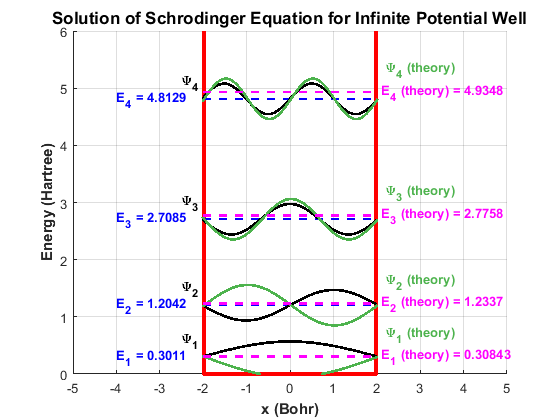

In [33]:
figure; 
hold on;
xlim = n/3;
plot(x,V,'r','linewidth',3)
for i = 1:4
    plot([-2,2],[Energy_eigenvalue(i,i),Energy_eigenvalue(i,i)], ...
    'b--','linewidth',2)
    E = eigenvectors(:,i)*2  +Energy_eigenvalue(i,i);
    plot(x(xlim:2*xlim), E(xlim:2*xlim) ,'k','linewidth',2)
    
    txt1 = ['E_{', num2str(i) ,'} = ' , num2str(Energy_eigenvalue(i,i))];
    text(-4,Energy_eigenvalue(i,i),txt1,'color',[0 0 1], ...
    'fontweight','bold')
    
    txt1 = ['\Psi_{', num2str(i) ,'} '];
    text(-2.5,Energy_eigenvalue(i,i)+0.3,txt1,'color',[0 0 0],...
    'fontweight','bold')
    
    E_act = i^2*(pi)^2/2/4^2;               % theoretical value of energy
    txt1 = ['E_{', num2str(i) ,'} (theory) = ' , num2str(E_act)];
    
    xx = linspace(0,2*x(xlim));
    psi_actual = sqrt(2/4) * (sin(xx * i / 4 *pi) ) / 2; 
                                            % theoretical value of wfnc
    plot(xx - x(xlim), psi_actual+Energy_eigenvalue(i,i) , ...
    'color',[0.3 0.7 0.3],'linewidth',2)
    
    text(2.1,E_act,txt1,'color',[1 0 1],'fontweight','bold')
    plot([-2,2],[E_act,E_act], 'm--','linewidth',2)
    
    txt1 = ['\Psi_{', num2str(i) ,'} (theory)'];
    text(2.20,E_act+0.4,txt1,'color',[0.3 0.7 0.3],'fontweight','bold')
end
grid on;axis([-5,5,0,6]);
xlabel('x (Bohr)','fontweight','bold');
ylabel('Energy (Hartree)','fontweight','bold');
title('Solution of Schrodinger Equation for Infinite Potential Well', ...
    'fontsize',13)

$\mathbf{Observations:}$

1. It is interesting to note here that for the lowest two eigenstates, numerical solution has the inverted shape of the theoretical one. **This is due to the fact   that   the   numerical   solution   obtained   from   MATLAB  has   scaling   factor   (-1)   multiplied   to   it,   which   actually   does   not   change    the    eigen-   wave   function.    This   does   change   the   direction   but   conceptually  both represent the  same   vector   in   Hilbert   space .**

2. The energy calculated from numerical computation for the solution is not exactly the same as theoretical result. This result can be improved by using more sample points as well as higher estmation value for infinite potential. 

3. Different numerical algorithms (e.g. Finite Element Method) can be employed to improve the accuracy of the result with limited mesh size.

### Solution of Schrodinger Equation for Linear Potential well
$\mathbf{ Problem \ Specification:}$ The potential for this can be considered as a constant electric field acting across the potential well, which is the reason behind the tappered potential profile. We will try to determine the electronic energy states at the bottom of potential well. The potential profile is given below:

$$V(x) =  
\begin{cases}
    eE_{x} x,& \text{if } 0 \leq x\leq L \ \\
    \infty,              & \text{otherwise}
\end{cases}
$$

where $E_{x}$ is  **static electric field ** acting on electron with charge $e=1$ (in atomic unit). For this calculation let's assume $eE_{x} = 0.4 \ Hartree \ / \ Bohr , \ L = 4 \ Bohr$. The code snippet below generate the energy eigenvalue and energy eigenfunction for this case:

$\mathbf{Remarks \ on \ Theoretical \ solution:}$ This problem does not have any solution using closed elementary functional form. One may need **Airy function**(defined below) to get the solution, which is an integral and require numerical treatment to extract values. So presenting Airy function does not serve any purpose here because it is also prone to numerical errors.
$$ Ai(x) = \frac{1}{\pi} \lim_{b\to\infty}\int_{0}^{b} \cos(\ \frac{t^{3}}{3} + xt \ ) \ dx$$

In [18]:
n = 333; x = linspace(-4,8,n);
V = [1e6*ones(1,n/3), 0.4*linspace(0,4,n/3), 1e6*ones(1,n/3)];
Delta = x(2) - x(1);
H = Hamiltonian(V,Delta);
[  eigenvectors, Energy_eigenvalue ] = eig(H);

$\mathbf{Plotting \ the \ Solutions:}$

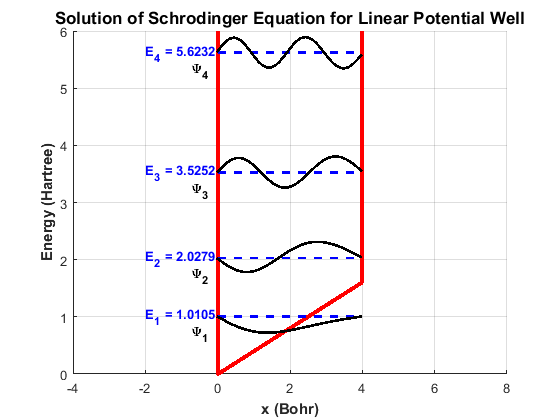

In [28]:
figure; 
hold on;
xlim = n/3;
plot(x,V,'r','linewidth',3)
for i = 1:4
    plot([0,4],[Energy_eigenvalue(i,i),Energy_eigenvalue(i,i)], ...
    'b--','linewidth',2)
    E = eigenvectors(:,i)*2  +Energy_eigenvalue(i,i);
    plot(x(xlim:2*xlim), E(xlim:2*xlim) ,'k','linewidth',2)
    
    txt1 = ['E_{', num2str(i) ,'} = ' ,  ...
    num2str(Energy_eigenvalue(i,i))];
    text(-2,Energy_eigenvalue(i,i),txt1,'color',[0 0 1], ...
    'fontweight','bold')
    
    txt1 = ['\Psi_{', num2str(i) ,'} '];
    text(-0.75,Energy_eigenvalue(i,i)-0.3,txt1,'color', ...
    [0 0 0],'fontweight','bold')
end
grid on;axis([-4,8,0,6]);
xlabel('x (Bohr)','fontweight','bold');
ylabel('Energy (Hartree)','fontweight','bold');
title('Solution of Schrodinger Equation for Linear Potential Well', ...
    'fontsize',13)

$\mathbf{Observations:}$

1. The wavefunction has much higher energy from its counterpart inside the infinite potential well as well as it has slight distortion in wavefunction for lower energy states. This is not surprising because it is well accounted fact that wave-function possesses similiar (a)symmetry of potential profile and losses it in case of asymmetric potential.
2. The lowest energy state suffers the most distortion alongside a significant quantum tunneling effect in the large side of the potential section. The confinement of ground state into the sharpe part of potential profile also exemplifies the 2DEG condition in heterostructures. This also represent the localization of electron cloud for applied electric field known as polarization.
3. Higher energy states are just similar to the infinite potential well. The reason behind this is the small perturbed part in the bottom of potential well does not add enough distortion in the high energy wave-functions that is detectable by eye.

### Solution of Schrodinger Equation for Infinite Potential Well with Small Barrier
$\mathbf{Problem \ Specification:}$ Two potential well is placed next to each other so that they can interact. This problem can be thought of as a very poor approximation of a diatomic molecule. The potential profile is given below:

$$V(x) =  
\begin{cases}
    0 & \text{if } 0 \leq x\leq \frac{L}{3} \ \text{and} \ \frac{2L}{3} \leq x\leq L  \\
    V_{0} & \text{if } \frac{L}{3} < x < \frac{2L}{3} \\
    \infty,& \text{otherwise}
\end{cases}
$$

For the purpose of numerical calculation we take $L \ = \ 3 \ Bohr$ and $V_{0} \ = \ 4 \ Hartree$. The MATLAB program construction for the specific system is presented below:

In [40]:
n = 333; x = linspace(-3,6,n);
V = [1e6*ones(1,n/3), zeros(1,n/9), 4*ones(1,n/9) , ...
    zeros(1,n/9), 1e6*ones(1,n/3)];
Delta = x(2) - x(1);
H = Hamiltonian(V,Delta);
[  eigenvectors, Energy_eigenvalue ] = eig(H);

$\mathbf{Plotting \ the \ Solutions:}$

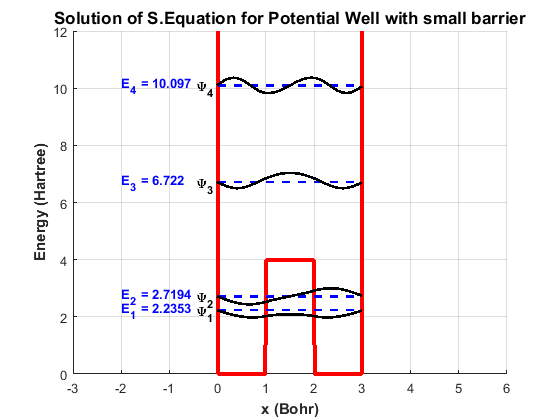

In [48]:
figure; 
hold on;
xlim = n/3;
plot(x,V,'r','linewidth',3)
for i = 1:4
    plot([0,3],[Energy_eigenvalue(i,i),Energy_eigenvalue(i,i)], ...
    'b--','linewidth',2)
    E = eigenvectors(:,i)*2  +Energy_eigenvalue(i,i);
    plot(x(xlim:2*xlim), E(xlim:2*xlim) ,'k','linewidth',2)
    
    txt1 = ['E_{', num2str(i) ,'} = ' , ...
    num2str(Energy_eigenvalue(i,i))];
    text(-2,Energy_eigenvalue(i,i),txt1,'color', ...
    [0 0 1],'fontweight','bold')
    
    txt1 = ['\Psi_{', num2str(i) ,'} '];
    text(-0.45,Energy_eigenvalue(i,i)-0.1,txt1,'color', ...
    [0 0 0],'fontweight','bold')
end
grid on;axis([-3,6,0,12]);
xlabel('x (Bohr)','fontweight','bold');
ylabel('Energy (Hartree)','fontweight','bold');
title('Solution of S.Equation for Potential Well with small barrier'...
    ,'fontsize',13)

$\mathbf{Observations:}$

1. This solution beautifully demonstrates the band splitting of two interacting potential well. If the width and height of the barrier would much higher the ground states would be exactly at the same level. By lowering both, we allow them interact with each other, which causes the splitting of ground state to **bonding** and **anti-bonding** energy states. Bonding state has no node in it. On the other hand anti-bonding state has a single node inside of it, which is also an another indicator of higher energy solution.

2. Despite the fact that the bottom of the well has prominent change in their wave-functions, the higher energy states has now more energy than the previous two problems. It is expected in a sense that the barrier inside the well causes huge disturbances in their perturbation part which led to the drastic change.

3. Symmetry properties of wave-functions are present in this case, which comes with no surprise because the potential is symmetric.

4. The coupling of both wells and tunning wave-function through the barrier reminiscent of the bonding between two atoms. That is why it can be treated as very poor approximation of diatomic molecule. 

# Problem : Solving Poisson's Equation 

## Poisson's Equation:
Poisson's equation gives the relation between electrical charge density and electrostatic potential. By combining Gauss law (in divergent form) with the definition of electro-static field (scaler potential gradient) we can formulate the following equation also known as **Poisson's Equation**.

$$ \nabla( \ \epsilon \ \nabla V) = -\rho $$

where $\rho$ is the charge density and $\epsilon$ is the permittivity of the material and $V$ is the elctrostatic potential. For isotropic material this equation can be simplified into:

$$ \nabla^2 V = -\frac{\rho}{\epsilon} $$

Poisson's equation has most of its application focused in calculating the voltage profile in various materials whether by analytically or numerically. The numerical solution involving FDM for Poisson's equation starts from formulating linear system of equations for specific device or material geometry. The linear system of equations is given below, where $V_{i}, \ \rho_{i}$ is the voltage and charge density of the material respectively at the $i^{th}$ sampling instance, $\epsilon_{ri}$ is the dielectric constant of the structure at the same point and $\Delta$ is the distance between two sampling points.



$$\frac{V_{i-1}}{\Delta^2} - \frac{2V_{i}}{\Delta^2} + \frac{V_{i+1}}{\Delta^2} = \frac{-\rho_{i}}{\epsilon_{ri}\epsilon_{0}} \\
   \implies V_{i-1} - 2V_{i} + V_{i+1} = \frac{-\rho_{i}\Delta^2}{\epsilon_{ri}\epsilon_{0}} \ for \ i = \ 1,2, ..., n
$$

If some boundary conditions are given the first and last equations needed to be modified according to the condition.

### Solving Poisson's Equation for P-n junction with applied bias

$\mathbf{Problem \ Specification}$: Lets consider n-Ge to P-GaAs **P-n** hetero-juncton at $T \ = \ 300 \ K$ has $N_{Ge} \ = \ 10^{16} \ \text{cm}^{-3}$ and $N_{GaAs} \ = \ 10^{16} \ \text{cm}^{-3}$ which also has built in voltage $V_{bi} \approx 1.0 \ V$. The device has a length about $3 \ \mu m$ and both semiconductor has equal dimension. We assume that the doping doesn't change the dielectric contant of these matrials, so $\epsilon_{Ge} \ = \ 16.0$ and $\epsilon_{GaAs} \ = \ 13.1$. The n-Ge terminal is subjected to $V_0 \ = \ 3 \ V$ and P-GaAs is grounded. Now we can calculate the depletion layer width of the materials, which turns out to be $W_{Ge} \ = \ 0.56469 \ \mu m$ and $W_{GaAs} \ = \ 0.56469 \ \mu m$.

In [107]:
eps_0     = 8.854187817e-12; % in F/m
eps_Ge    = 16.0;
eps_GaAs  = 13.1; 
N_Ge      = 1e22;            % in m^-3
N_GaAs    = 1e22;            % in m^-3
V_0       = 3;               % in Volt
V_bi      = 1;               % in Volt
e         = 1.6e-19;         % in coloumb
n         = 500;              % number of samples
L         = 3e-6;            % length of the device
x         = linspace(-L/2,L/2,n); % in meter
W_Ge      = sqrt(2 * eps_0 * eps_Ge * eps_GaAs* (V_bi + V_0)* N_Ge ...
            / e / N_GaAs / (eps_Ge * N_Ge + eps_GaAs * N_GaAs));
W_GaAs    = sqrt(2 * eps_0 * eps_Ge * eps_GaAs* (V_bi + V_0) * N_GaAs...
            / e / N_Ge / (eps_Ge * N_Ge + eps_GaAs * N_GaAs));

$\mathbf{System \ of \ Equation:}$ These equations forms a system of equations which can be rewritten as follows:

$$ \mathbf{K_{j} \ V_{j} \ = \ b_{j} } \ for \ j\ = \ 1, 2$$

where $\mathbf{K_{j}}$ is almost like the **Stiffness matrix**  but has a modified first row for $j\ =\ 1$ and has a modified last row for $j\ =\ 2$ to accommodate the boundary conditions, $V$ is the voltage at each sampling point and $b_{i} \ = \ \frac{-\rho_{i}\Delta^2}{\epsilon_{ri}\epsilon_{0}} \ for \ i = \ 2,3, ..., n-1$ , but $b_{1} \ = \ \frac{-\rho_{i}\Delta^2}{\epsilon_{ri}\epsilon_{0}} - V_0$ and $b_{n} \ = \ \frac{-\rho_{i}\Delta^2}{\epsilon_{ri}\epsilon_{0}} - V_{n+1}$. In this particular problem we set $\mathbf{V_0 \ = \ 3V \ and \ V'_0 = 0}$ as well as $\mathbf{V_{n+1} \ = \ 0V \ and \ V'_{n+1} = 0}$. **We choose derivative of the both en equal to zero because that would mean that ELECTRIC FIELD at both end vanishes.** These are the $\mathbf{boundary \ conditions}$ for this problem. 
In this code snippet below we solve the voltage profile for this system:



In [112]:
m = floor(n/2);
K = toeplitz([-2 1 zeros(1,m-2)]);
K1 = [1 -1 zeros(1,m-2); K];
K2 = [K; zeros(1,m-2) -1 1];
K2 = [1 zeros(1,m); K2']';
K1 = [K1'; zeros(1,m) 1]';

% charge density 
rho = zeros(1,length(x));
rho((x>(-W_Ge) & x<0)) = e * N_Ge;
rho((x<(W_GaAs) & x>=0)) = -e * N_GaAs;

% construction of b matrix
Delta = x(2) - x(1);
b = rho;
b(x<0) = -b(x<0)* Delta^2/ eps_Ge / eps_0;
b(x>=0) = -b(x>=0) * Delta^2/ eps_GaAs / eps_0;

%implementing boundary conditions
b(1) = b(1) - V_0;
b1 = [0 b];b2 = [b 0];

%solving the system of equations
V1 = inv(K1)*b1(1:m+1)';
V2 = inv(K2)*b2(m+1:end)';
V = [V1', V2'];
V = V(2:end-1); %removing extra variables

$\mathbf{Plotting \ the \ Solutions:}$

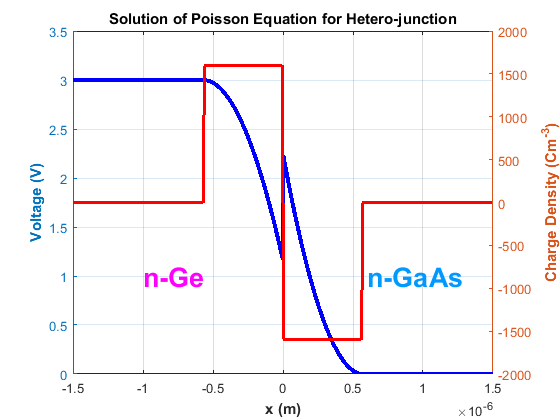

In [131]:
yyaxis left
plot(x,V,'b', 'linewidth', 3)
ylabel('Voltage (V)','fontweight','bold')
xlabel('x (m)','fontweight','bold')

text(-1e-6,1,'n-Ge','color',[1 0 1],'fontweight','bold',...
    'fontsize',20)
text(0.6e-6,1,'n-GaAs','color',[0 0.6 1],'fontweight','bold',...
    'fontsize',20)
grid on
yyaxis right
plot(x,rho,'r', 'linewidth', 2)
ylabel('Charge Density (Cm^{-3})','fontweight','bold')
title('Solution of Poisson Equation for Hetero-junction')

$\mathbf{Observations:}$

1. Although the analytical solution is not given here, but from the shape of the curve it can be said with almost certainty that the numerical solution is not wrong.

2. We implement the boundary condition at the both end, so the problem reduces two different linear system of equation. They might have same solution at the interfaces but the difference in permitivitty of the materials does not allow them to be same at the interface, which causes the spike in the band diagram (In reality difference in work function also liable for this change).